In [11]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed) 

In [12]:
import os
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities


#os.chdir("D:\semicolon\Deep Learning");
df=pd.read_csv('jokes.csv');


x=df['Question'].values.tolist()
y=df['Answer'].values.tolist()

corpus= x+y
  
tok_corp= [nltk.word_tokenize(sent.decode('utf-8')) for sent in corpus]
           
model = gensim.models.Word2Vec(tok_corp, min_count=1, size = 32)

#model.save('testmodel')
#model = gensim.models.Word2Vec.load('test_model')
#model.most_similar('word')
#model.most_similar([vector])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gonzalo.moreno\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pattern-2.6-py3.6.egg\\pattern\\text\\en\\wordnet\\dict\\index.noun'

In [4]:
model.most_similar('vector')

[(u'Trilingual', 0.6726022958755493),
 (u'maled', 0.667369544506073),
 (u'chicken', 0.6664585471153259),
 (u'turducken', 0.641279399394989),
 (u'plum', 0.6358986496925354),
 (u'Refrigerators', 0.6274476051330566),
 (u'cow', 0.6211307048797607),
 (u'Eye-deer', 0.6191414594650269),
 (u'Painter', 0.6179731488227844),
 (u'exterminator', 0.6149735450744629)]

In [5]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [73]:
## Twitter sentiment using textblob  
import tweepy
import numpy as np 
from textblob import TextBlob

# Step 1 - Authenticate 
consumer_key= 'W7HwSRUwBJaYzuAl19JdB5Pfu'
consumer_secret= '1cOMrX76J3rE1wWH6Q2Aw7oSk5Fogppo6B7d9HzJXwP3Yj67Iw'

access_token='1098995911-MEWZz80LoXe3Kl6yDvJ6NRrc1HaEk9P68KlGTbb'
access_token_secret='fca6OZBBpC9jqqgkWKIFW12FehQAKsho3xVpoqRYeQsbL'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#Step 3 - Retrieve Tweets containing key word
public_tweets = api.search('Obama')

sentiment_polarities=[] 

for tweet in public_tweets:
    print(tweet.text)    
    #Step 4 Perform Sentiment Analysis on Tweets
    blob = TextBlob(tweet.text)
    print(blob.sentiment)
    #print(blob.translate(to="es"))
    sentiment_polarities.append(blob.sentiment.polarity)
    print("")
    
print "------------------------------------------------------------------"
print "Average Sentiment Score: %0.2f" %np.array(sentiment_polarities).mean()  
print len(sentiment_polarities)

INFO : PARAMS: {'q': 'Obama'}


@REDACT_PSUDONYM @MargaretsBelly @realDonaldTrump Lol no different than what Obama faced.
Sentiment(polarity=0.4, subjectivity=0.6499999999999999)

RT @robertsjonathan: Everyone goes mental at Trump when he threatens to retaliate against North Korea. None of them minded Obama doing the…
Sentiment(polarity=-0.1, subjectivity=0.2)

RT @RexTilllerson: #UNGA
FOR 8 YEARS: Obama repeatedly apologized to the World for America's Greatness

TODAY: Trump boasts to the World of…
Sentiment(polarity=0.0, subjectivity=0.0)

RT @SethAMandel: Watching Obama/Clinton hands and the press defend Venezuela and North Korea because they hate Trump is depressing.
Sentiment(polarity=-0.7, subjectivity=0.9)

RT @horowitz39: Awaiting apologies from media, "liberals." NeverTrumpers who called  Trump a liar for saying his team was wiretapped https:…
Sentiment(polarity=0.0, subjectivity=0.0)

@ashleymarin16 @15_RNG @thetrueed @funder @altjellyroller If Obama would of done something so stupid, they would be… https:/

In [7]:
train = [('I love this sandwich.', 'pos'),
('this is an amazing place!', 'pos'),
('I feel very good about these beers.', 'pos'),
('this is my best work.', 'pos'),
("what an awesome view", 'pos'),
('I do not like this restaurant', 'neg'),
('I am tired of this stuff.', 'neg'),
("I can't deal with this", 'neg'),
('he is my sworn enemy!', 'neg'),
('my boss is horrible.', 'neg')
]


test = [ ('the beer was good.', 'pos'),
('I do not enjoy my job', 'neg'),
("I ain't feeling dandy today.", 'neg'),
("I feel amazing!", 'pos'),
('Gary is a friend of mine.', 'pos'),
("I can't believe I'm doing this.", 'neg')]

In [9]:
###What if you want to customaize your classifier based on sentences and labels:) 
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [19]:
result=[]
for i in test:
    blob=TextBlob(i[0], classifier=cl)
    result.append(blob.classify()==i[1])

result

[True, True, True, True, False, True]

In [16]:
test[1][1]

'neg'

In [14]:
TextBlob("The beer is good. But the hangover is horrible.", classifier=cl).classify()

'pos'

In [34]:
# Let's use this custom classifier 
public_tweets = api.search('hangover')

sentiment_polarities=[] 
for tweet in public_tweets:
    print(tweet.text)    
    #Step 4 Perform Sentiment Analysis on Tweets
    blob = TextBlob(tweet.text, classifier=cl) ## custom classifier
    print(blob.sentiment)
    sentiment_polarities.append(blob.sentiment.polarity)
    print("")
    #@can we do emoji sentiment? 
    
print "------------------------------------------------------------------"
print "Average Sentiment Score: %0.2f" %np.array(sentiment_polarities).mean() 

Jetlag is genuinely worse than a hangover...my mind is on less than autopilot 😵😵😵😵 #jetlag #Icannot
Sentiment(polarity=-0.2833333333333333, subjectivity=0.3333333333333333)

the plan was to drink until the pain over, but what's worse the pain or the hangover?
Sentiment(polarity=-0.4, subjectivity=0.6)

@andydumamba  g na? Hahaha o hangover kpa?
Sentiment(polarity=0.2, subjectivity=0.4)

RT @Polls_king1: Funniest movie of all time round 3 part 1 #GroundhogDay  @Home_Alone_Kev   @AirplaneMovie  #Hangover
Sentiment(polarity=-0.2, subjectivity=0.4)

RT @UFCKian: Long day in work ahead. Think I'll just hide in the jacuzzi for the day #gymlife #hangover
Sentiment(polarity=-0.05, subjectivity=0.4)

RT @bilad1987: Hangover horn #cock #dick #horny #gay #bi #cockout #wank #precum #cum #sex #porn #GayDaddy #men https://t.co/SDS5nyo3Mf
Sentiment(polarity=0.4166666666666667, subjectivity=0.5833333333333334)

I think it's the hangover from the boat still
Sentiment(polarity=0.0, subjectivity=0.0)

I 

In [35]:
## Another Sentiment Analysis 
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# IMDB Dataset loading
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)

trainX, trainY = train
testX, testY = test

# Data preprocessing
# Sequence padding
trainX = pad_sequences(trainX, maxlen=100, value=0.)
testX = pad_sequences(testX, maxlen=100, value=0.)

# Converting labels to binary vectors
trainY = to_categorical(trainY, nb_classes=2)
testY = to_categorical(testY, nb_classes=2)

# Network building
net = tflearn.input_data([None, 100])
net = tflearn.embedding(net, input_dim=10000, output_dim=128)
net = tflearn.lstm(net, 128, dropout=0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')


# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=(testX, testY), show_metric=True,
          batch_size=32)

Training Step: 7039  | total loss: 0.03504 | time: 152.310s
| Adam | epoch: 010 | loss: 0.03504 - acc: 0.9913 -- iter: 22496/22500
Training Step: 7040  | total loss: 0.03304 | time: 155.318s
| Adam | epoch: 010 | loss: 0.03304 - acc: 0.9922 | val_loss: 0.86013 - val_acc: 0.8144 -- iter: 22500/22500
--


In [ ]:
#GloVe
##https://github.com/stanfordnlp/GloVe
#!cd glove && make
#!./demo.sh

## NLP with Quora Paired Question Data: Semantic Matching  

In [63]:
#https://data.quora.com/First-Quora-Dataset-Release-Question-Pairs
import pandas as pd
import numpy as np
import string
from __future__ import division
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import gensim
from gensim.models import Word2Vec
import logging

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_table('quora_duplicate_questions.tsv')
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 100)

In [12]:
df.head(100) 

id  qid1  qid2  \
0    0     1     2   
1    1     3     4   
2    2     5     6   
3    3     7     8   
4    4     9    10   
5    5    11    12   
6    6    13    14   
7    7    15    16   
8    8    17    18   
9    9    19    20   
10  10    21    22   
11  11    23    24   
12  12    25    26   
13  13    27    28   
14  14    29    30   
15  15    31    32   
16  16    33    34   
17  17    35    36   
18  18    37    38   
19  19    39    40   
20  20    41    42   
21  21    43    44   
22  22    45    46   
23  23    47    48   
24  24    49    50   
25  25    51    52   
26  26    53    54   
27  27    55    56   
28  28    57    58   
29  29    59    60   
..  ..   ...   ...   
70  70   141   142   
71  71   143   144   
72  72   145   146   
73  73   147   148   
74  74   149   150   
75  75   151   152   
76  76   153   154   
77  77   155   156   
78  78   157   158   
79  79   159   160   
80  80   161   162   
81  81   163   164   
82  82   165   166   
83  83   167   168   
84  84   169   170   
85  85   171   172   
86  86   173   174   
87  87   175   176   
88  88   177   178   
89  89   179   180   
90  90   181   182   
91  91   183   184   
92  92   185   186   
93  93   187   188   
94  94   189   190   
95  95   191   192   
96  96   193   194   
97  97   195   196   
98  98   197   198   
99  99   199   200   

                                                                                                                                                                      question1  \
0                                                                                                            What is the step by step guide to invest in share market in india?   
1                                                                                                                           What is the story of Kohinoor (Koh-i-Noor) Diamond?   
2                                                                                                     How can I increase the speed of my internet connection while using a VPN?   
3                                                                                                                            Why am I mentally very lonely? How can I solve it?   
4                                                                                                  Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?   
5                                                                                        Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?   
6                                                                                                                                                           Should I buy tiago?   
7                                                                                                                                                How can I be a good geologist?   
8                                                                                                                                               When do you use シ instead of し?   
9                                                                                                                  Motorola (company): Can I hack my Charter Motorolla DCX3400?   
10                                                                                                                    Method to find separation of slits using fresnel biprism?   
11                                                                                                                                  How do I read and find my YouTube comments?   
12                                                                                                                                         What can make Physics easy to learn?   
13                                                                                                                                  W

In [13]:
df.dropna(inplace = True)
df.drop(['id','qid1','qid2'], axis=1, inplace = True)

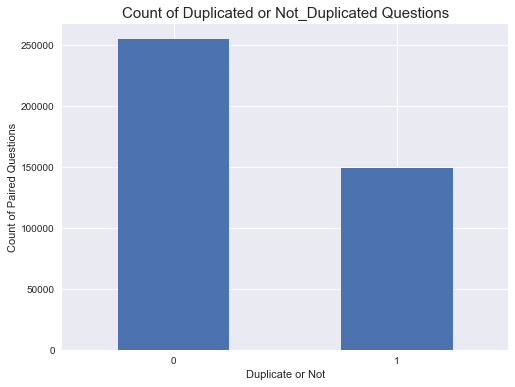

In [14]:
plt.rcParams['figure.figsize'] = (8, 6)
df.groupby('is_duplicate').is_duplicate.count().plot(kind='bar', rot=0)
plt.xlabel('Duplicate or Not')
plt.ylabel('Count of Paired Questions')
plt.title('Count of Duplicated or Not_Duplicated Questions', fontsize=15)
plt.show()

In [15]:
X = df[['question1', 'question2']]
y = df.is_duplicate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
# Null Model for df_test
y_test.value_counts()[0]/len(y_test)

0.63219471171683694

In [33]:
# Feature Engineering
# Get stopwords_set and punctuation set.
stopwords_set = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Get unigrams for each sentence.
def get_unigram_sentence(sentence):
    return [word for word in word_tokenize(sentence.lower()) if word not in stopwords_set and\
            word not in punctuation]

# Function to get unigrams of question1 and question2.
def get_unigrams(df):
    df['question1_unigram'] = df['question1'].apply(lambda x:\
                                             get_unigram_sentence(x.decode(encoding='utf-8')))
    df['question2_unigram'] = df['question2'].apply(lambda x:\
                                             get_unigram_sentence(x.decode(encoding='utf-8')))
# Get unigrams of question1 and question2 of training dataset.
get_unigrams(df_train)

# Function to get common_unigram_ratio.
def get_common_unigram_ratio(df):
    df['common_unigram_count'] = df.apply(lambda x: len(set(x['question1_unigram']).\
                                        intersection(set(x['question2_unigram']))), axis=1)
    
    df['unigram_count'] = df.apply(lambda x: max(len(set(x['question1_unigram']).\
                                   union(set(x['question2_unigram']))), 1), axis=1)
    
    df['common_unigram_ratio'] = df['common_unigram_count'] / df['unigram_count']

# Get common_unigram_ratio of training dataset.
get_common_unigram_ratio(df_train)


# Function to get bigrams of question1 and question2.
def get_bigrams(df):
    df['question1_bigram'] = df['question1_unigram'].apply(lambda x: [i for i in ngrams(x, 2)])
    df['question2_bigram'] = df['question2_unigram'].apply(lambda x: [i for i in ngrams(x, 2)])
    
# Get bigrams of question1 and question2 of training dataset.
get_bigrams(df_train)


# Function to get common_bigram_ratio.
def get_common_bigram_ratio(df):
    df['common_bigram_count'] = df.apply(lambda x: len(set(x['question1_bigram']).\
                                         intersection(set(x['question2_bigram']))), axis=1)

    df['bigram_count'] = df.apply(lambda x: max(len(set(x['question1_bigram']).\
                                union(set(x['question2_bigram']))), 1), axis=1)

    df['common_bigram_ratio'] = df['common_bigram_count'] / df['bigram_count']
    
    
# Get common_bigram_ratio of training dataset.
get_common_bigram_ratio(df_train)

# Function to get trigrams of question1 and question2.
def get_trigrams(df):
    df['question1_trigram'] = df['question1_unigram'].apply(lambda x: [i for i in ngrams(x, 3)])
    df['question2_trigram'] = df['question2_unigram'].apply(lambda x: [i for i in ngrams(x, 3)])

# Get trigrams of question1 and question2 of traning dataset.
get_trigrams(df_train)

# Function to get common_trigram_ratio of question1 and question2.
def get_common_trigram_ratio(df):
    df['common_trigram_count'] = df.apply(lambda x: len(set(x['question1_trigram']).\
                                          intersection(set(x['question2_trigram']))), axis=1)

    df['trigram_count'] = df.apply(lambda x: max(len(set(x['question1_trigram']).\
                                   union(set(x['question2_trigram']))), 1), axis=1)

    df['common_trigram_ratio'] = df['common_trigram_count'] / df['trigram_count']
    
# Get common_trigram_ratio of question1 and question2 of training dataset.
get_common_trigram_ratio(df_train)


# Make tfidf_matrix of paired quesions.
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords_set)

tfidf_matrix = tfidf_vectorizer.fit(df_train.question1.values + df_train.question1.values)

# Function to get cosine_similarity of each paired questions.
def get_cosine_similarity(df):
    tfidf_matrix_transform1 = tfidf_vectorizer.transform(df.question1.values)
    tfidf_matrix_transform2 = tfidf_vectorizer.transform(df.question2.values)
    cos = []
    for i in range(len(df)):
        cos.append(cosine_similarity(tfidf_matrix_transform1[i].toarray(),\
                                     tfidf_matrix_transform2[i].toarray()))

    df['cosine_similarity'] = cos
    df['cosine_similarity'] = df.cosine_similarity.apply(lambda x: x[0][0])

# Get cosine_similarity of each paired quesions of training dataset.
get_cosine_similarity(df_train)

In [39]:
df_train.head(2)

question1  \
5001                                                                               When do I start preparing for the UPSC exam?   
254499  What resources would you give to an American adult, who has never studied a language before, to begin studying Italian?   

                                                                                                                      question2  \
5001                                                                  Where from and how should I start preparing for the UPSC?   
254499  What resources would you give to an American adult, who has never studied a language before, to begin studying Spanish?   

        is_duplicate  \
5001               1   
254499             0   

                                                                                    question1_unigram  \
5001                                                                   [start, preparing, upsc, exam]   
254499  [resources, would, give, american, adult, never, studied, language, begin, studying, italian]   

                                                                                    question2_unigram  \
5001                                                                         [start, preparing, upsc]   
254499  [resources, would, give, american, adult, never, studied, language, begin, studying, spanish]   

        common_unigram_count  unigram_count  common_unigram_ratio  \
5001                       3              4              0.750000   
254499                    10             12              0.833333   

                                                                                                                                                                                  question1_bigram  \
5001                                                                                                                                         [(start, preparing), (preparing, upsc), (upsc, exam)]   
254499  [(resources, would), (would, give), (give, american), (american, adult), (adult, never), (never, studied), (studied, language), (language, begin), (begin, studying), (studying, italian)]   

                                                                                                                                                                                  question2_bigram  \
5001                                                                                                                                                       [(start, preparing), (preparing, upsc)]   
254499  [(resources, would), (would, give), (give, american), (american, adult), (adult, never), (never, studied), (studied, language), (language, begin), (begin, studying), (studying, spanish)]   

        cosine_similarity  common_bigram_count  bigram_count  \
5001             0.887933                    2             3   
254499           0.879002                    9            11   

        common_bigram_ratio  \
5001               0.666667   
254499             0.818182   

                                                                                                                                                                                              question1_trigram  \
5001                                                                                                                                                        [(start, preparing, upsc), (preparing, upsc, exam)]   
254499  [(resources, would, give), (would, give, american), (give, american, adult), (american, adult, never), (adult, never, studied), (never, studied, language), (studied, language, begin), (language, b...   

                                                                                                                                                                                              question2_trigram  \
5001                                                                                           

In [60]:
#Models
feature_cols = ['common_unigram_ratio', 'common_bigram_ratio','common_trigram_ratio',\
                'cosine_similarity']
df_train_X = df_train[feature_cols]
df_train_y = df_train.is_duplicate

# Random Forest Clssifier Model
rfc_grid = {'max_depth': [3, 5],
            'n_estimators': [100, 300],
            'max_features': ['sqrt']}
rfc_gridsearch = GridSearchCV(RandomForestClassifier(),
                                 rfc_grid,
                                 n_jobs=-1,
                                 cv = 3,
                                 scoring='accuracy')
rfc_gridsearch.fit(df_train_X, df_train_y)

rfc_gridsearch.best_params_
rfc_gridsearch.best_score_

0.69542322712919014

In [61]:
# Gradient Boosting Classifier Model
gbc_grid = {'learning_rate': [0.01,0.1],
            'n_estimators': [100, 300],
            'max_features': ['sqrt']}
gbc_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                                 gbc_grid,
                                 n_jobs=-1,
                                 verbose=True,)
gbc_gridsearch.fit(df_train_X, df_train_y)

gbc_gridsearch.best_params_
gbc_gridsearch.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.6min finished


0.70574865538574005

In [49]:
# test 
get_unigrams(df_test)
get_common_unigram_ratio(df_test)
get_bigrams(df_test)
get_common_bigram_ratio(df_test)
get_trigrams(df_test)
get_common_trigram_ratio(df_test)
get_cosine_similarity(df_test)

In [50]:
df_test_X = df_test[feature_cols]
df_test_y = df_test.is_duplicate

gbc = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt', n_estimators=300)
gbc.fit(df_train_X, df_train_y)

def get_scores(model, df_test_X, df_test_y):
    model_accuracy_score = accuracy_score(df_test_y, model.predict(df_test_X))
    model_recall_score = recall_score(df_test_y, model.predict(df_test_X))
    model_precision_score = precision_score(df_test_y, model.predict(df_test_X))
    model_roc_auc_score = roc_auc_score(df_test_y, model.predict_proba(df_test_X)[:,1])
    print 'Accuracy Score = {:.2f}\nRecall Score= {:.2f}\nPrecision Score = {:.2f}\nAUC_Score = {:.2f}'.\
      format(model_accuracy_score, model_recall_score, model_precision_score, model_roc_auc_score)
        
get_scores(gbc, df_test_X, df_test_y)

Accuracy Score = 0.71
Recall Score= 0.62
Precision Score = 0.60
AUC_Score = 0.79


## Method 2: Word2Vec 


In [51]:
# Configure the logging model so that Word2Vec creates nice output messages.
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)

In [52]:
# Get unigrams of the whole dataset.
get_unigrams(df)
# Combine question1 and question2 to list.
sentences = df.question1_unigram.tolist() + df.question2_unigram.values.tolist()

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 1    # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model.
model_self_trained = Word2Vec(sentences, workers=num_workers, \
                 size=num_features, min_count=min_word_count, \
                 window=context, sample=downsampling)
# Get the names of the words in the model's vocabulary. Convert it to a set, for speed.
model_words = set()
for item in sentences:
    for i in item:
        model_words.add(i)
    
# Function to average all of the word vectors.
def make_feature_vec(df, model, model_words, num_features):
    counter = 0
    # Pre-initialize an empty numpy array (for speed)
    df_vecs = np.zeros((len(df), num_features), dtype= 'float32')
    for i in df.index.values:
        words = df.question1_unigram[i] + df.question2_unigram[i]
        set_words = set(words)
        nwords = 0.
        feature_vecs = np.zeros((num_features,), dtype= 'float32')
    #  Loop over each word in the question1 and question2 and, if it is in the model's vocaublary,\
    #  add its feature vector to the total.
        for word in set_words:
            if word in model_words: 
                nwords = nwords + 1
                feature_vecs = np.add(feature_vecs,model[word])
        df_vecs[counter] = np.divide(feature_vecs, nwords + 1.)                                 
        counter += 1
    return df_vecs

# Get training dataset vectors.
df_train_vecs_s = make_feature_vec(df_train, model_self_trained, model_words, num_features)
# Get testing dataset vectors.
df_test_vecs_s = make_feature_vec(df_test, model_self_trained, model_words, num_features)

# Fit the model
rmc = RandomForestClassifier(n_estimators=10)
rmc.fit(df_train_vecs_s, df_train_y)
get_scores(rmc, df_test_vecs_s, df_test_y)

INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO : PROGRESS: at sentence #10000, processed 56111 words, keeping 12256 word types
INFO : PROGRESS: at sentence #20000, processed 112453 words, keeping 17931 word types
INFO : PROGRESS: at sentence #30000, processed 168482 words, keeping 22258 word types
INFO : PROGRESS: at sentence #40000, processed 224152 words, keeping 25857 word types
INFO : PROGRESS: at sentence #50000, processed 280423 words, keeping 29198 word types
INFO : PROGRESS: at sentence #60000, processed 336549 words, keeping 32150 word types
INFO : PROGRESS: at sentence #70000, processed 392599 words, keeping 34782 word types
INFO : PROGRESS: at sentence #80000, processed 448754 words, keeping 37080 word types
INFO : PROGRESS: at sentence #90000, processed 504837 words, keeping 39319 word types
INFO : PROGRESS: at sentence #100000, processed 560920 words, keeping 41487 word types
INFO : PROGRESS: at se

INFO : PROGRESS: at 20.12% examples, 728482 words/s, in_qsize 7, out_qsize 0
INFO : PROGRESS: at 23.61% examples, 728968 words/s, in_qsize 8, out_qsize 1
INFO : PROGRESS: at 27.08% examples, 732129 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 30.46% examples, 731481 words/s, in_qsize 7, out_qsize 0
INFO : PROGRESS: at 33.81% examples, 731364 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 37.24% examples, 732984 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 40.64% examples, 734099 words/s, in_qsize 7, out_qsize 0
INFO : PROGRESS: at 44.08% examples, 734506 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 47.60% examples, 736220 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 50.97% examples, 735883 words/s, in_qsize 7, out_qsize 0
INFO : PROGRESS: at 54.28% examples, 735275 words/s, in_qsize 7, out_qsize 0
INFO : PROGRESS: at 57.67% examples, 735768 words/s, in_qsize 8, out_qsize 0
INFO : PROGRESS: at 60.94% examples, 734725 words/s, in_qsize 8, out_qsize 0

Accuracy Score = 0.77
Recall Score= 0.57
Precision Score = 0.75
AUC_Score = 0.82


In [59]:
len(sentences)

808576

In [ ]:
# Utility Functions
def default_clean(text):
    '''
    Removes default bad characters
    '''
    if not (pd.isnull(text)):
        text = filter(lambda x: x in string.printable, text)
        bad_chars = set(["@", "+", '<br>', '<br />', '/', "'", '"', '\\',
                        '(',')', '<p>', '\\n', '<', '>', '?', '#', ',',
                        '.', '[',']', '%', '$', '&', ';', '!', ';', ':',
                        '-', "*", "_", "=", "}", "{"])
        for char in bad_chars:
            text = text.replace(char, " ")
        text = re.sub('\d+', "", text)

    return text

def stop_and_stem(text, stem=True, stemmer = PorterStemmer()):
    '''
    Removes stopwords and does stemming
    '''
    stoplist = stopwords.words('english')

    if stem:
        text_stemmed = [[stemmer.stem(word) for word in document.lower().split()
                         if word not in stoplist] for document in text]
    else:
        text_stemmed = [[word for word in document.lower().split()
                 if word not in stoplist] for document in text]

    return text_stemmed


def make_corpus(parsed_text, bigrams=True, filter_extremes=False, below=5, above=0.1):
    '''
    Prepares corpus and dictionary with options for removing outliers or using bigrams
    '''

    if bigrams:
        bigrams = Phrases(parsed_text)
        corpora_dict = corpora.Dictionary(bigrams[parsed_text])
        parsed_text = bigrams[parsed_text]
    else:
        corpora_dict = corpora.Dictionary(parsed_text)

    # Filter the dict to remove redundant words
    if filter_extremes:
        print("Size of dict before filter: %s") % len(corpora_dict)
        corpora_dict.filter_extremes(no_below=below, no_above=above)
        print("Size of dict after filter: %s") % len(corpora_dict)


    # Convert the cleaned documents into bag of words
    corpus = [corpora_dict.doc2bow(t) for t in parsed_text]

    return corpora_dict, corpus


def data_transformation(input_data, bigrams=True, stem_flag=True, filter_extremes=False, below=5, above=0.1):
    '''
    Combines all data transformation steps: clean, drop stopwords, stem, make corpus
    '''

    clean_reviews = [default_clean(d).lower() for d in input_data]
    stemmed = stop_and_stem(clean_reviews, stem=stem_flag)
    dictn, data = make_corpus(stemmed, bigrams=bigrams, filter_extremes=filter_extremes,
                              below=below, above=above)

    return data, dictn

In [29]:
# clean up raw reviews and prepare dataset for model
corpus, dictionary = data_transformation(reviews, bigrams=False,\
                                         stem_flag=False, filter_extremes=True, below=5, above=0.2)

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : built Dictionary(10 unique tokens: [u'tripadvisor', u'nsurlnamekey', u'data', u'nsurlfilesizekey', u'bplist']...) from 2 documents (total 10 corpus positions)
INFO : discarding 10 tokens: [(u'tripadvisor', 1), (u'nsurlnamekey', 1), (u'xls', 1), (u'nsurlfilesizekey', 1), (u'data', 1), (u'v', 1), (u'nsurlfileresourcetypekey', 1), (u'bplist', 1), (u'jdi', 1), (u'nsurlfileresourcetyperegular', 1)]...
INFO : keeping 0 tokens which were in no less than 5 and no more than 0 (=20.0%) documents
INFO : resulting dictionary: Dictionary(0 unique tokens: [])


Size of dict before filter: 10
Size of dict after filter: 0


In [31]:
reviews[1]

'\x82\x00_\x10\x1cNSURLFileResourceTypeRegular\x08\x0f\x1c/Jdi\x00\x00\x00\x00\x00\x00\x01\x01\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x88'

In [3]:
# reviews=[] 
# directory = os.path.normpath("data")
# for subdir, dirs, files in os.walk(directory):
#     for file in files:
#         if file.endswith(".txt"):
#             f=open(os.path.join(subdir, file),'r')
#             raw=f.read()
#             f.close()
#             lines = raw.splitlines() # split on lines and carriages \n\r
           
#             print len(lines[1].strip('<Content>').split('\n')[0])


In [ ]:
from jNlp.jTokenize import jTokenize
input_sentence = u'私は彼を５日前、つまりこの前の金曜日に駅で見かけた'
list_of_tokens = jTokenize(input_sentence)
print '--'.join(list_of_tokens).encode('utf-8')
from jNlp.jCabocha import cabocha
print cabocha(input_sentence).encode('utf-8')

from jNlp.jConvert import *
input_sentence = u'気象庁が２１日午前４時４８分、発表した天気概況によると、'
print ' '.join(tokenizedRomaji(input_sentence))
print tokenizedRomaji(input_sentence)

In [ ]:
from jNlp.jProcessing import long_substr
a = u'これでアナタも冷え知らず'
b = u'これでア冷え知らずナタも'
print long_substr(a, b).encode('utf-8')
    

In [ ]:
from jNlp.jProcessing import Similarities
s = Similarities()
a = u'これは何ですか？'
b = u'これはわからないです'
print s.minhash(' '.join(jTokenize(a)), ' '.join(jTokenize(b)))
    

In [ ]:
from jNlp.jSentiments import *
classifier = Sentiment()
classifier.train(en_swn, jp_wn)
text = u'監督、俳優、ストーリー、演出、全部最高！'
print classifier.baseline(text)


In [12]:
##pip install --upgrade gensim
## pip install nltk
!pip install tqdm
!pip install --upgrade https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow-1.0.1-cp27-none-linux_x86_64.whl
#pip install keras
!pip install bokeh

tensorflow-1.0.1-cp27-none-linux_x86_64.whl is not a supported wheel on this platform.
